In [1]:
from importlib import reload 
import mass_function as mf
import mass_profile as mp
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import quad
import astropy.units as u
import scipy
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline

/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [55]:
%reload_ext autoreload

# Power Law Test

In [458]:
reload(mf)

<module 'mass_function' from '/Users/fangirl/Repos/Kris/dmsl/dmsl/mass_function.py'>

In [90]:
p = mf.PowerLaw(alpha=-1.65, M_0 = 10**2)

In [91]:
p.n_l

<Quantity [0.        , 0.        , 7.48152584, 5.37033975, 3.86834241,
           2.80186676, 2.03003236, 1.49627124, 1.18228304, 0.87651866]>

In [345]:
p.m_l

array([  1.        ,   1.66810054,   2.7825594 ,   4.64158883,
         7.74263683,  12.91549665,  21.5443469 ,  35.93813664,
        59.94842503, 100.        ])

In [346]:
def func(m_l):
    return m_l * (m_l/10**4)**-2

In [85]:
norm = quad(func,1,100) #Normalization quad/367.92016
A = 367.92016/norm[0]

NameError: name 'quad' is not defined

In [84]:
power_law = []
for i in range(len(p.m_l)):
    power_law.append(np.ceil(A*(p.m_l[i]/10**4)**-2)) #-- USE QUAD to get normalization! 

NameError: name 'A' is not defined

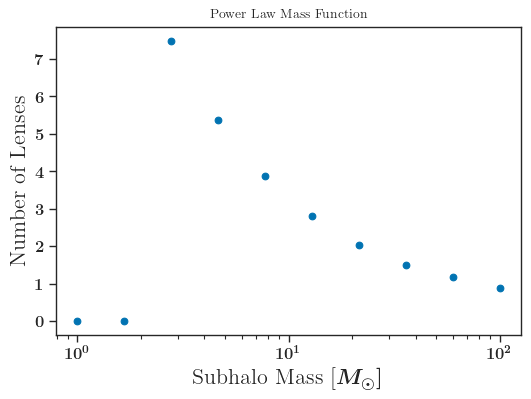

In [95]:
plt.title('Power Law Mass Function')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Number of Lenses')
plt.scatter(p.m_l,p.n_l)
#plt.legend()
plt.show()

In [24]:
reload(mf)

<module 'mass_function' from '/Users/fangirl/Repos/Kris/dmsl/dmsl/mass_function.py'>

In [231]:
p = mf.PowerLaw(alpha=-2, M_0 = 10**4)

1.482464907016492e-06 248181364.91657603 367.92016406427797 solMass


In [232]:
p.check_density

True

In [233]:
print(p.n_l, p.m_l)

[1.48246491e+02 5.32770269e+01 1.91467711e+01 6.88099281e+00
 2.47290119e+00 8.88715475e-01 3.19388169e-01 1.14782810e-01
 4.12510685e-02 1.48246491e-02] [  1.           1.66810054   2.7825594    4.64158883   7.74263683
  12.91549665  21.5443469   35.93813664  59.94842503 100.        ]


In [234]:
sum = 0
for i in range(len(p.n_l)):
    sum += p.n_l[i]*p.m_l[i]
print(sum)

367.9201640642781


In [80]:
mf.Rho_dm*((p.sur.fov_deg.to(u.rad).value)** 2 * p.sur.maxdlens**3 / 3.)

<Quantity 367.92016406 solMass>

In [87]:
(p.sur.fov_deg.to(u.rad).value)** 2 * p.sur.maxdlens**3 / 3.

<Quantity 2.84309592e-05 kpc3>

In [222]:
np.sum(p.n_l*p.m_l)

367.920164064278

# Tinker Function Test

In [160]:
reload(mf)

<module 'mass_function' from '/Users/fangirl/Repos/Kris/dmsl/dmsl/mass_function.py'>

In [161]:
#%%timeit ####DOESNT SAVE t
t = mf.test_Tinker()

In [117]:
t.sig

[<Quantity 1.61328711e+16>,
 <Quantity 6.26312082e+15>,
 <Quantity 2.18342918e+15>,
 <Quantity 7.32453177e+14>,
 <Quantity 2.61186975e+14>,
 <Quantity 9.13253357e+13>,
 <Quantity 3.2091449e+13>,
 <Quantity 1.16542888e+13>,
 <Quantity 4.1594818e+12>,
 <Quantity 1.5849331e+12>]

In [118]:
t.f

array([0.186, 0.186, 0.186, 0.186, 0.186, 0.186, 0.186, 0.186, 0.186,
       0.186])

In [119]:
t.der

<Quantity [4.33477839e+06, 2.99201140e+05, 4.39962196e+04, 5.99933328e+03,
           6.46544758e+02, 8.84120894e+01, 9.53316639e+00, 1.48097464e+00,
           2.05125864e-01, 1.91053000e-02]>

In [125]:
t.n_l

array([355.,   8.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.])

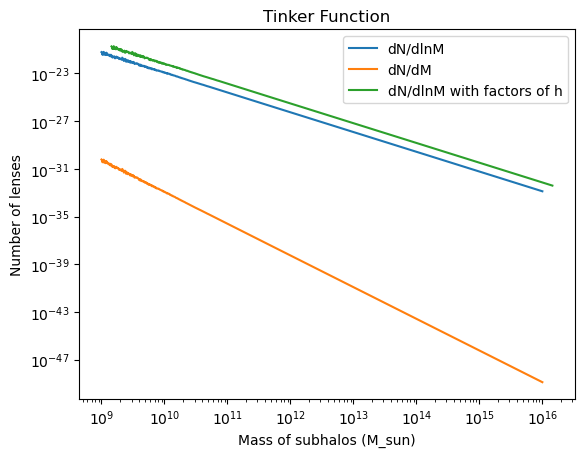

In [162]:
plt.title('Tinker Function')
plt.xlabel('Mass of subhalos (M_sun)')
plt.ylabel('Number of lenses')
plt.xscale('log')
plt.yscale('log')
#plt.plot(p.m_l,power_law, label='Power Law')
plt.plot(t.m_l,t.m_l*t.n_l, label='dN/dlnM')
plt.plot(t.m_l,t.n_l, label='dN/dM')
plt.plot(t.m_l/mf.h, t.m_l*t.n_l/mf.h**3,label='dN/dlnM with factors of h')
plt.legend()
plt.show()

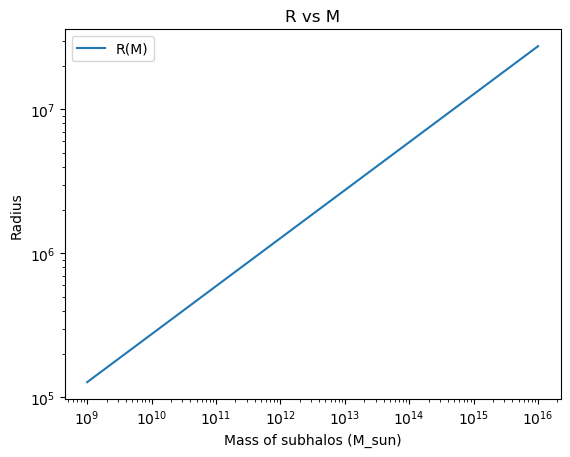

In [163]:
plt.title('R vs M')
plt.xlabel('Mass of subhalos (M_sun)')
plt.ylabel('Radius')
plt.xscale('log')
plt.yscale('log')
#plt.plot(p.m_l,power_law, label='Power Law')
plt.plot(t.m_l,t.R, label='R(M)')
plt.legend()
plt.show()

In [274]:
##Set values from cosmo and table 1 in Colossus paper
from classy import Class
from astropy.cosmology import WMAP7 as cosmo
cosmol = Class()
cosmol.set({'P_k_max_1/Mpc':100,'omega_b':0.0223828,'omega_m':0.1201075,'h':cosmo.h,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
cosmol.set({'output':'mPk'})

True

In [275]:
cosmol.compute()

In [276]:
kk = np.logspace(-3,np.log10(100),10000) # k in 1/Mpc
h = 0.693
Pk = [] # P(k) in (Mpc)**3
for k in kk:
    Pk.append(cosmol.pk(k,0.)*h**3) # function .pk(k,z)

In [302]:
P = [cosmol.pk(k,0)*h**3 for k in kk]

CosmoSevereError: 

Error in Class: No power spectrum computed. You must add mPk to the list of outputs.

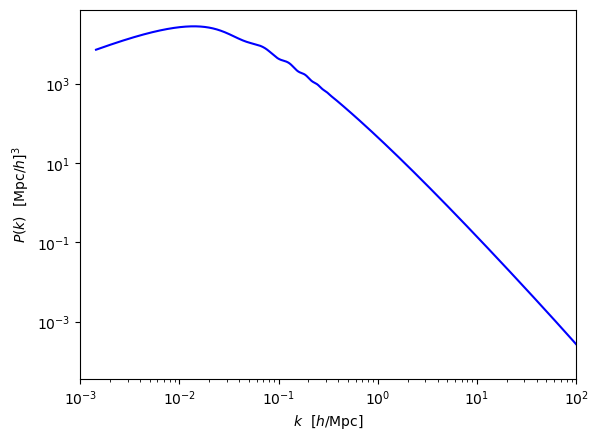

In [178]:
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk/h,Pk,'b-')
plt.show()

In [60]:
print(len(Pk))

10000


In [277]:
F = scipy.interpolate.interp1d(np.log10(kk), np.log10(Pk), fill_value='extrapolate')
10**F(np.log10(100))

9.39929425477015e-05

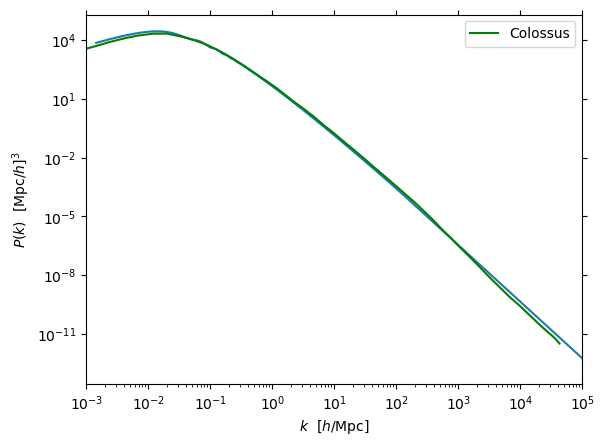

In [278]:
k_interp = np.logspace(-3,np.log10(100000), 1000)
plt.figure(2)
pk_mod = 10**F(np.log10(k_interp))
plt.xscale('log');plt.yscale('log');plt.xlim(k_interp[0],k_interp[-1])
#plt.ylim(pk_mod[0],pk_mod[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.tick_params(top=True, right= True)
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(k_interp/h,pk_mod,'-')

df = pd.read_csv('~/Downloads/Colossus Power Spectrum.csv')
plt.plot(df.x,df.y, 'g', label='Colossus')

#df1 = pd.read_csv('~/Downloads/Mishra-Sharma Pk.csv')
#plt.plot(df1.x,df1.y,'r',label ='Mishra-Sharma')

plt.legend()
plt.show()
#pk_mod1 = 10**F(np.log10(k_interp*h))
#plt.plot(k_interp,pk_mod1,'-')

In [279]:
A_s = 2.105 * 10**-9
k_s = 0.05
n_s = 0.9665
n_b = 2.0
k_b = 13
s = np.logspace(-3,np.log10(100000), 1000)
#phi_low = lambda k: ((A_s * (k / k_s)) ** (n_s - 1))
#phi_high = lambda k: (A_s * (k_b / k_s) ** (n_s - 1) * (k / k_b) ** (n_b - 1))
phi = np.piecewise(s, [s<k_b, s>=k_b], [lambda s: A_s * (s / k_s) ** (n_s - 1), 
                                        lambda s: A_s * (k_b / k_s) ** (n_s - 1) * (s / k_b) ** (n_b - 1)])

In [280]:
#Adding dimensions to phi 
phi = phi * 2*np.pi**2/s**3

#Transfer Function
D2 = 10**F(np.log10(s))/(phi)

In [264]:
10**F(np.log10(100))

9.39929425477015e-05

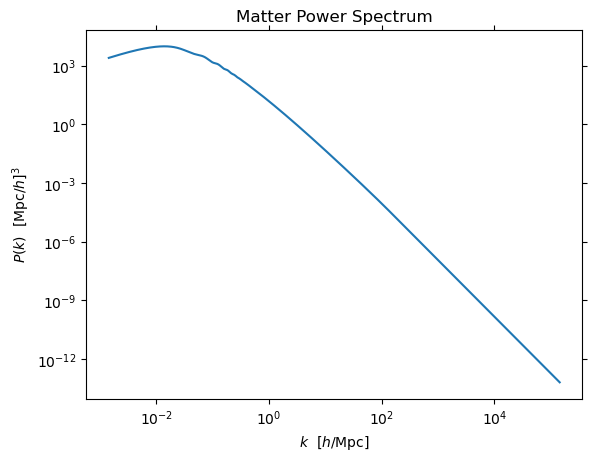

In [282]:
plt.title('Matter Power Spectrum')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.tick_params(top=True, right= True)
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(s/h, phi*D2*h**3)

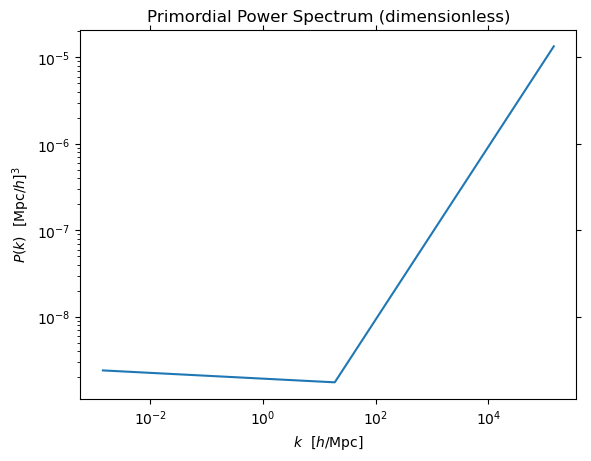

In [283]:
plt.title('Primordial Power Spectrum (dimensionless)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.tick_params(top=True, right= True)
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(s/h, phi*s**3/(2*np.pi**2))

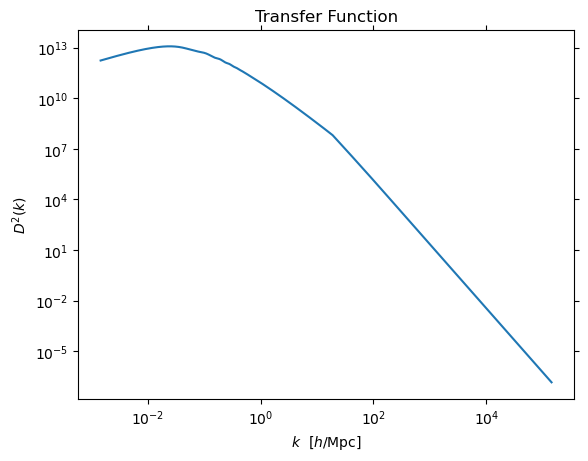

In [142]:
plt.title('Transfer Function')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.tick_params(top=True, right= True)
plt.ylabel(r'$D^2(k)$')
plt.plot(s/h, D2)

# Tinker 

In [97]:
%%time
reload(mf)
t = mf.test_Tinker(m_l=np.logspace(0, 2, 10))

KeyboardInterrupt: 

In [308]:
print(mf.Rho_mean.to(u.M_sun/u.Mpc**3))
t = 185*u.pc
(1/t).to(1/u.Mpc)

37414033309.346954 solMass / Mpc3


<Quantity 5405.40540541 1 / Mpc>

## Mishra-Sharma

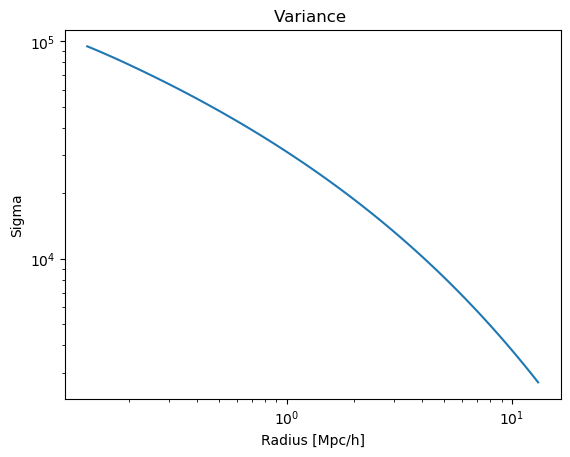

In [334]:
plt.title("Variance ")
plt.ylabel('Sigma')
plt.xlabel('Radius [Mpc/h]')
plt.xscale('log')
plt.yscale('log')
plt.plot(t.R*mf.h*10**-6, t.sig)
plt.show()

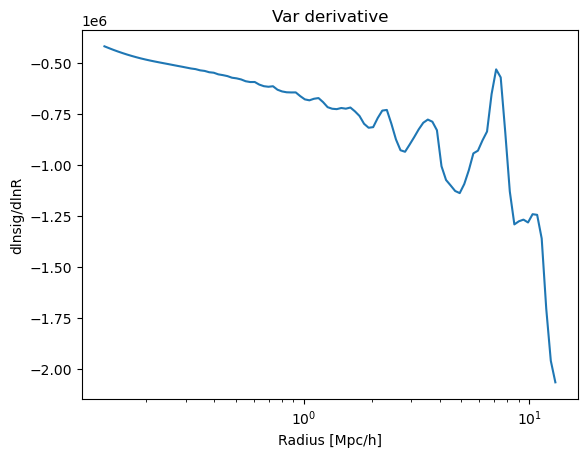

In [322]:
plt.title("Var derivative")
plt.ylabel('dlnsig/dlnR')
plt.xlabel('Radius [Mpc/h]')
plt.xscale('log')
plt.plot((t.R*mf.h)*10**-6, (t.der*t.R/t.sig)/t.sig)
plt.show()

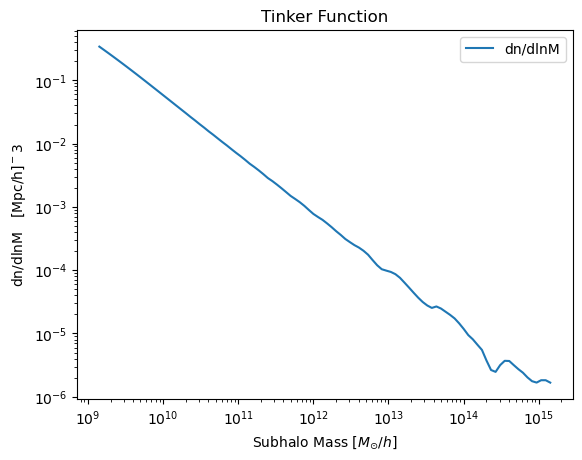

In [335]:
plt.title('Tinker Function')
plt.xlabel(r'Subhalo Mass [$M_{\odot}/h]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dn/dlnM $\,\,\,\, [\mathrm{Mpc/h}]^-3$')
#plt.plot(p.m_l,power_law, label='Power Law')
#plt.plot(t.m_l,t.m_l*t.den_n_l, label='dn/dlnM')
plt.plot(t.m_l/mf.h, t.m_l*t.den_n_l*mf.h**3,label='dn/dlnM')
plt.legend()
plt.show()

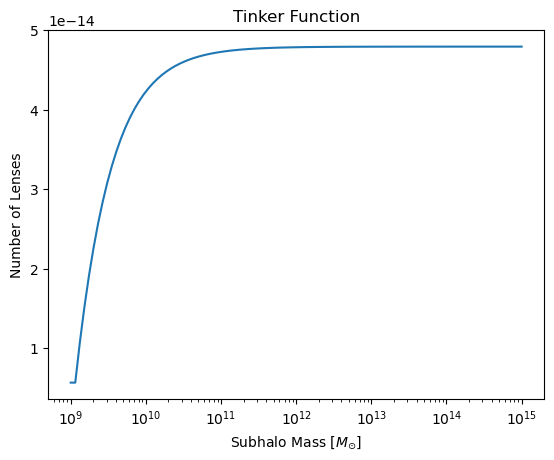

In [336]:
plt.title('Tinker Function')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Number of Lenses')
plt.plot(t.m_l, t.n_l)
plt.show()

## Colossus

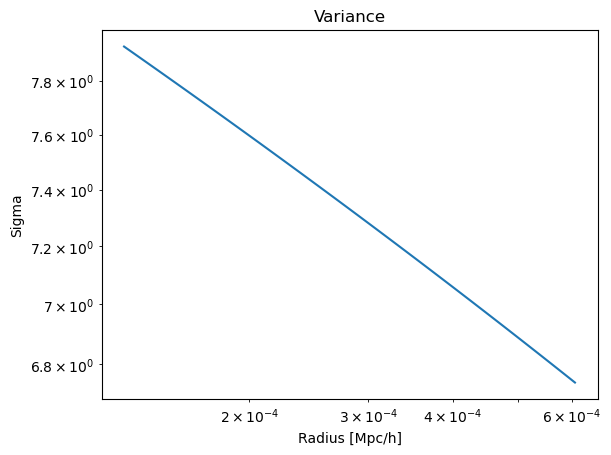

In [354]:
plt.title("Variance")
plt.ylabel('Sigma')
plt.xlabel('Radius [Mpc/h]')
plt.xscale('log')
plt.yscale('log')
plt.plot(t.R*mf.h*10**-6, t.sig)
plt.show()

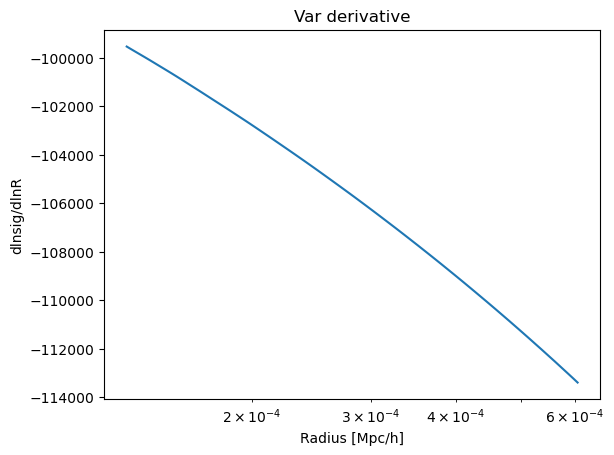

In [344]:
plt.title("Var derivative")
plt.ylabel('dlnsig/dlnR')
plt.xlabel('Radius [Mpc/h]')
plt.xscale('log')
#plt.yscale('log')
plt.plot((t.R*mf.h)*10**-6, (t.der*t.R/t.sig)/t.sig)
plt.show()

In [301]:
t.den_n_l

array([9.74622994e-28, 6.86098580e-28, 4.82463088e-28, 3.38700268e-28,
       2.37434632e-28, 1.66251621e-28, 1.16246411e-28, 8.11940441e-29,
       5.66550221e-29, 3.94831995e-29, 2.74918842e-29, 1.91270133e-29,
       1.33005020e-29, 9.24602760e-30, 6.42596499e-30, 4.46726009e-30,
       3.10500672e-30, 2.15744419e-30, 1.49960216e-30, 1.04225294e-30,
       7.22595973e-31, 5.03606035e-31, 3.49006562e-31, 2.43413875e-31,
       1.68512448e-31, 1.17826621e-31, 8.17709897e-32, 5.68412885e-32,
       3.97233664e-32, 2.75280299e-32, 1.91475836e-32, 1.33983953e-32,
       9.29699112e-33, 6.40620418e-33, 4.51004877e-33, 3.14821009e-33,
       2.17992189e-33, 1.49634111e-33, 1.06003145e-33, 7.40267589e-34,
       5.13538704e-34, 3.54383833e-34, 2.44204131e-34, 1.73116989e-34,
       1.22144796e-34, 8.47653623e-35, 5.77749267e-35, 3.96196704e-35,
       2.81131438e-35, 2.00694252e-35, 1.39814008e-35, 9.66218173e-36,
       6.60895842e-36, 4.57598966e-36, 3.12987994e-36, 2.21350610e-36,
      

In [208]:
n_c = scipy.integrate.cumulative_trapezoid(t.den_n_l,t.m_l, initial=1.67e-42)

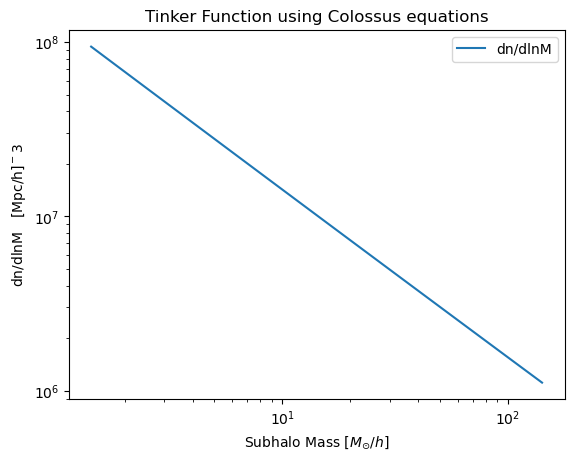

In [355]:
plt.title('Tinker Function using Colossus equations')
plt.xlabel(r'Subhalo Mass [$M_{\odot}/h]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dn/dlnM $\,\,\,\, [\mathrm{Mpc/h}]^-3$')
#plt.plot(p.m_l,power_law, label='Power Law')
#plt.plot(t.m_l,t.m_l*t.den_n_l, label='dn/dlnM')
plt.plot(t.m_l/mf.h, t.m_l*t.den_n_l*mf.h**3,label='dn/dlnM')
plt.legend()
plt.show()

NameError: name 't' is not defined

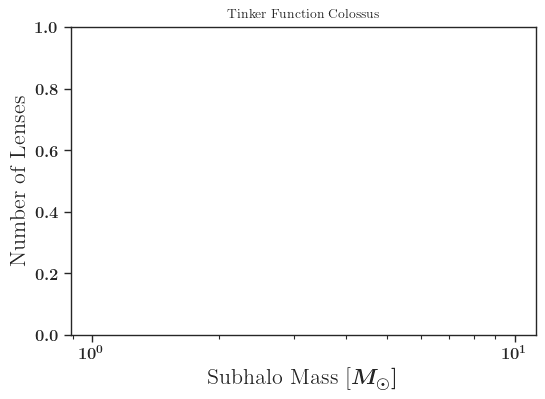

In [96]:
plt.title('Tinker Function Colossus')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Number of Lenses')
plt.scatter(t.m_l, t.n_l)
plt.show()

In [221]:
n = scipy.integrate.cumulative_trapezoid(t.den_n_l,t.m_l, initial=9.6e-21)

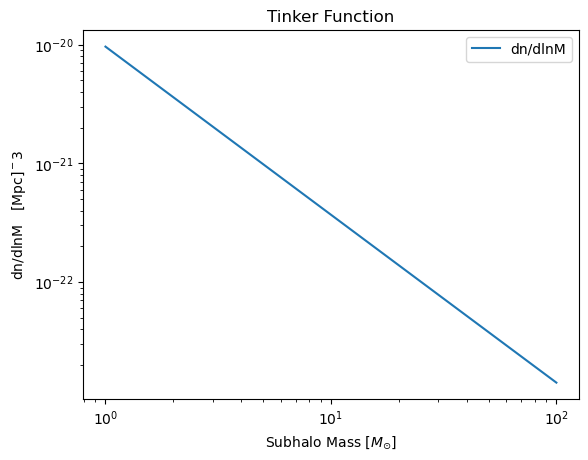

In [218]:
plt.title('Tinker Function')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dn/dlnM $\,\,\,\, [\mathrm{Mpc}]^-3$')
#plt.plot(p.m_l,power_law, label='Power Law')
plt.plot(t.m_l,t.m_l*t.den_n_l, label='dn/dlnM')
#plt.plot(t.m_l/mf.h, t.m_l*t.den_n_l*mf.h**3,label='dn/dlnM with factors of h')
plt.legend()
plt.show()

[  1.           1.04761575   1.09749877   1.149757     1.20450354
   1.26185688   1.32194115   1.38488637   1.45082878   1.51991108
   1.59228279   1.66810054   1.7475284    1.83073828   1.91791026
   2.009233     2.10490414   2.20513074   2.3101297    2.42012826
   2.53536449   2.65608778   2.7825594    2.91505306   3.05385551
   3.19926714   3.35160265   3.51119173   3.67837977   3.85352859
   4.03701726   4.22924287   4.43062146   4.64158883   4.86260158
   5.09413801   5.33669923   5.59081018   5.85702082   6.13590727
   6.42807312   6.73415066   7.05480231   7.39072203   7.74263683
   8.11130831   8.49753436   8.90215085   9.32603347   9.77009957
  10.23531022  10.72267222  11.23324033  11.76811952  12.32846739
  12.91549665  13.53047775  14.17474163  14.84968262  15.55676144
  16.29750835  17.07352647  17.88649529  18.73817423  19.6304065
  20.56512308  21.5443469   22.5701972   23.64489413  24.77076356
  25.95024211  27.18588243  28.48035868  29.8364724   31.2571585
  32.7454916

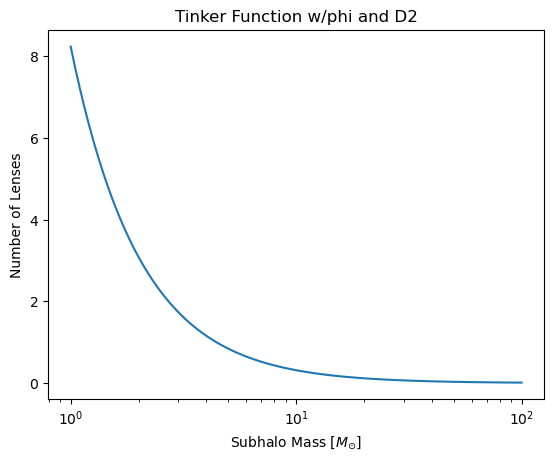

In [222]:
plt.title('Tinker Function w/phi and D2')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Number of Lenses')
print(t.m_l,n)
plt.plot(t.m_l, t.n_l)
plt.show()

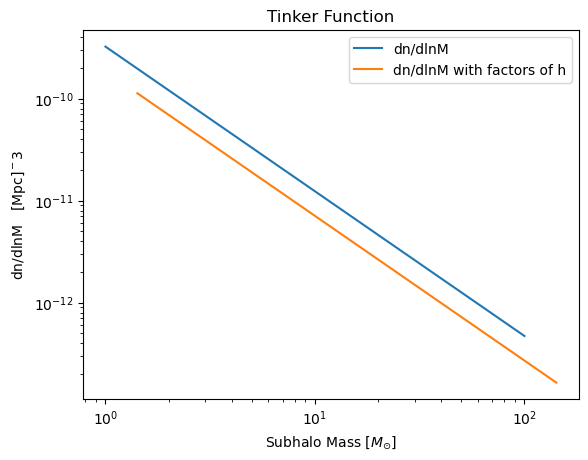

In [482]:
plt.title('Tinker Function')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dn/dlnM $\,\,\,\, [\mathrm{Mpc}]^-3$')
#plt.plot(p.m_l,power_law, label='Power Law')
plt.plot(t.m_l,t.m_l*t.den_n_l, label='dn/dlnM')
plt.plot(t.m_l/mf.h, t.m_l*t.den_n_l*mf.h**3,label='dn/dlnM with factors of h')
plt.legend()
plt.show()

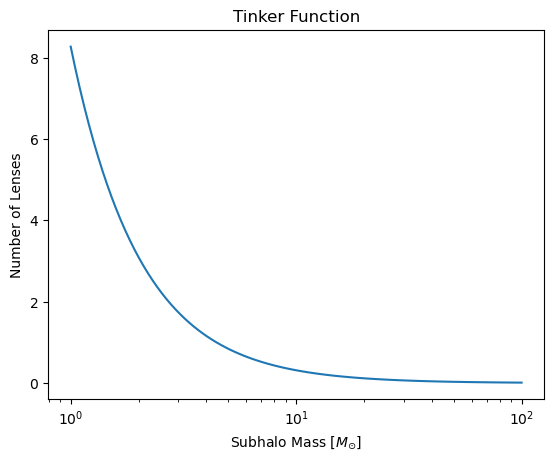

In [479]:
plt.title('Tinker Function')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Number of Lenses')
plt.plot(t.m_l,t.n_l)
#plt.legend()
plt.show()

In [103]:
trapz_cdm = scipy.integrate.cumtrapz(cdm.den_n_l,cdm.m_l, initial=2.5e-7)
simp_cdm = scipy.integrate.simpson(cdm.den_n_l,cdm.m_l,even='first')

In [156]:
#Testing integration methods: 
new_n = []
x = np.linspace(-2,2,50)
y = x #y = x function
new_x = (x[1:] + x[:-1]) / 2
for i in range(len(y) - 1):
    mtemp = [x[i], x[i + 1]]
    ntemp = [y[i], y[i + 1]]
    #new_n.append(scipy.integrate.simpson(ntemp,mtemp,even='first'))
    n = scipy.interpolate.interp1d(mtemp, ntemp)
    integrand = lambda m: n(m)
    new_n.append(scipy.integrate.quad(integrand, mtemp[0], mtemp[1])[0])
temp = scipy.interpolate.interp1d(new_x, new_n, fill_value='extrapolate')
N = temp(x)

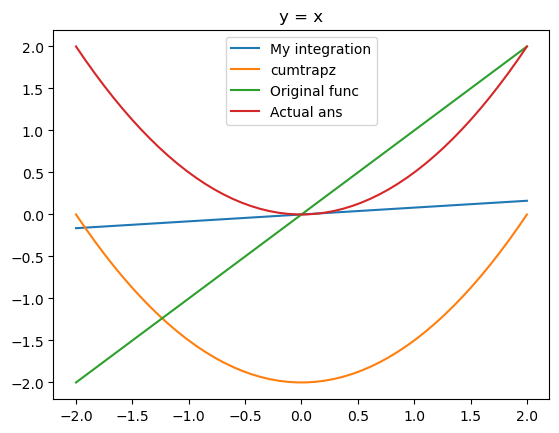

In [157]:
plt.title('y = x')
plt.plot(x,N, label="My integration")
plt.plot(x,scipy.integrate.cumulative_trapezoid(y,x,initial=0),label='cumtrapz')
plt.plot(x, y, label='Original func')
plt.plot(x,x**2/2, label="Actual ans")
plt.legend()
plt.show()

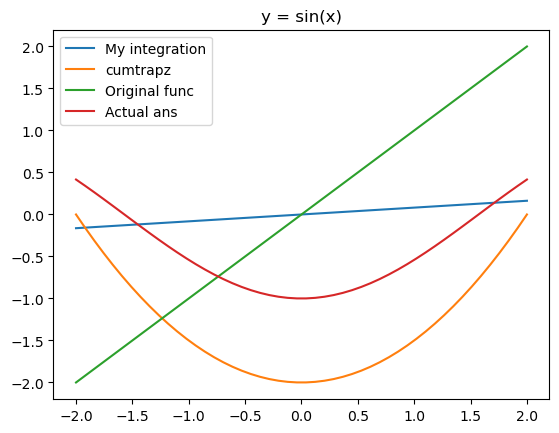

In [214]:
plt.title('y = sin(x)')
plt.plot(x,N, label="My integration")
plt.plot(x,scipy.integrate.cumulative_trapezoid(y,x,initial=0),label='cumtrapz')
plt.plot(x, y, label='Original func')
plt.plot(x,-np.cos(x), label="Actual ans")
plt.legend()
plt.show()

# CDM

In [130]:
%%time
reload(mf)
cdm = mf.CDM(m_l = np.logspace(0, np.log10(1000), 100))

CPU times: user 19.3 ms, sys: 2.92 ms, total: 22.2 ms
Wall time: 22.5 ms


In [460]:
cdm.m_l

array([  1.        ,   1.04761575,   1.09749877,   1.149757  ,
         1.20450354,   1.26185688,   1.32194115,   1.38488637,
         1.45082878,   1.51991108,   1.59228279,   1.66810054,
         1.7475284 ,   1.83073828,   1.91791026,   2.009233  ,
         2.10490414,   2.20513074,   2.3101297 ,   2.42012826,
         2.53536449,   2.65608778,   2.7825594 ,   2.91505306,
         3.05385551,   3.19926714,   3.35160265,   3.51119173,
         3.67837977,   3.85352859,   4.03701726,   4.22924287,
         4.43062146,   4.64158883,   4.86260158,   5.09413801,
         5.33669923,   5.59081018,   5.85702082,   6.13590727,
         6.42807312,   6.73415066,   7.05480231,   7.39072203,
         7.74263683,   8.11130831,   8.49753436,   8.90215085,
         9.32603347,   9.77009957,  10.23531022,  10.72267222,
        11.23324033,  11.76811952,  12.32846739,  12.91549665,
        13.53047775,  14.17474163,  14.84968262,  15.55676144,
        16.29750835,  17.07352647,  17.88649529,  18.73

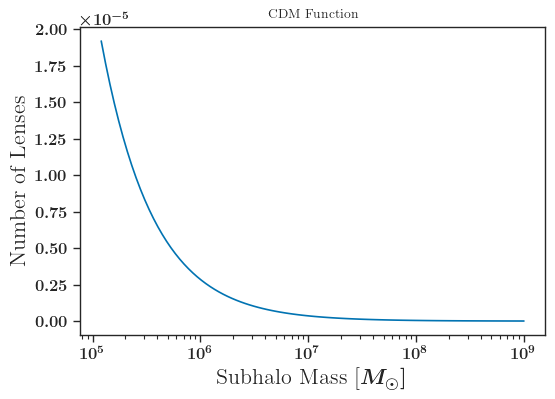

In [13]:
plt.title('CDM Function')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Number of Lenses')
plt.plot(cdm.m_l[2:],cdm.n_l[2:])
#plt.legend()
plt.show()

In [225]:
cdm.den_n_l*cdm.m_l

array([1959.25306301, 1839.9999327 , 1728.00533849, 1622.82747775,
       1524.0514389 , 1431.28756461, 1344.16991469, 1262.35482248,
       1185.51953919, 1113.36096062, 1045.59443151,  981.95262263,
        922.18447614,  866.05421529,  813.34041423,  763.83512457,
        717.34305503,  673.68080107,  632.67612134,  594.16725826,
        558.00229988,  524.03858062,  492.14211849,  462.18708649,
        434.05531633,  407.63583221,  382.82441303,  359.52318131,
        337.64021703,  317.08919503,  297.78904448,  279.66362903,
        262.64144654,  246.65534692,  231.6422673 ,  217.54298323,
        204.30187507,  191.86670853,  180.18842867,  169.22096634,
        158.92105647,  149.24806741,  140.16384058,  131.63254003,
        123.62051098,  116.09614714,  109.02976596,  102.39349159,
         96.16114487,   90.3081401 ,   84.81138799,   79.64920466,
         74.80122603,   70.24832752,   65.97254859,   61.95702192,
         58.18590682,   54.64432679,   51.31831079,   48.19473

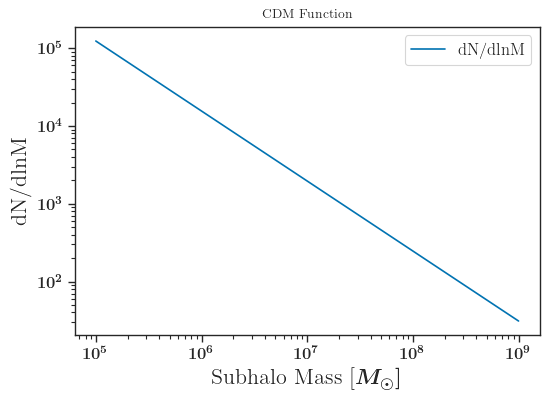

In [18]:
plt.title('CDM Function')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dN/dlnM ')
#plt.plot(p.m_l,power_law, label='Power Law')
plt.plot(cdm.m_l,cdm.m_l*cdm.den_n_l, label='dN/dlnM')
#plt.plot(cdm.m_l/mf.h, cdm.m_l*cdm.den_n_l*mf.h**3,label='dN/dlnM with factors of h')
plt.legend()
plt.show()

In [132]:
%%time
reload(mf)
wdm_s = mf.WDM_stream(m_l=np.logspace(0, np.log10(1000), 100))

CPU times: user 17.9 ms, sys: 2.53 ms, total: 20.4 ms
Wall time: 20.1 ms


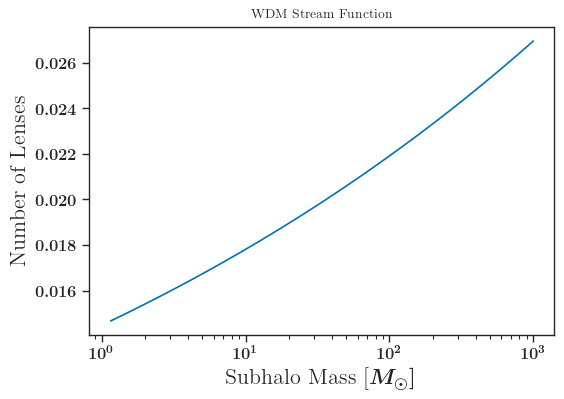

In [133]:
plt.title('WDM Stream Function')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Number of Lenses')
plt.plot(wdm_s.m_l[2:],wdm_s.n_l[2:])
#plt.legend()
plt.show()

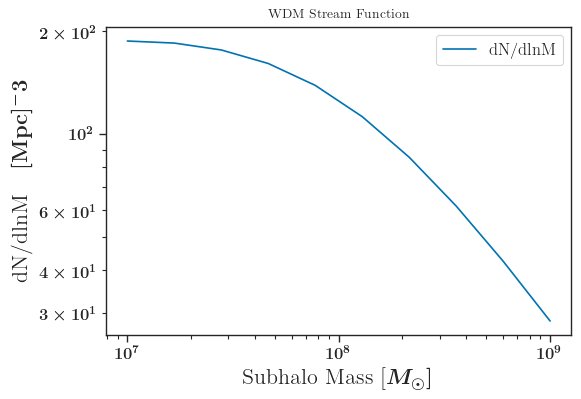

In [82]:
plt.title('WDM Stream Function')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dN/dlnM $\,\,\,\, [\mathrm{Mpc}]^-3$')
#plt.plot(p.m_l,power_law, label='Power Law')
plt.plot(wdm_s.m_l,wdm_s.m_l*wdm_s.den_n_l, label='dN/dlnM')
#plt.plot(cdm.m_l/mf.h, cdm.m_l*cdm.den_n_l*mf.h**3,label='dN/dlnM with factors of h')
plt.legend()
plt.show()

In [236]:
%%time
reload(mf)
wdm_l = mf.WDM_lensing(m_l=np.logspace(1, np.10(100), 10))

14690850324.066706
Norm: 1.866879495737448e-09
CPU times: user 156 ms, sys: 6.54 ms, total: 163 ms
Wall time: 170 ms


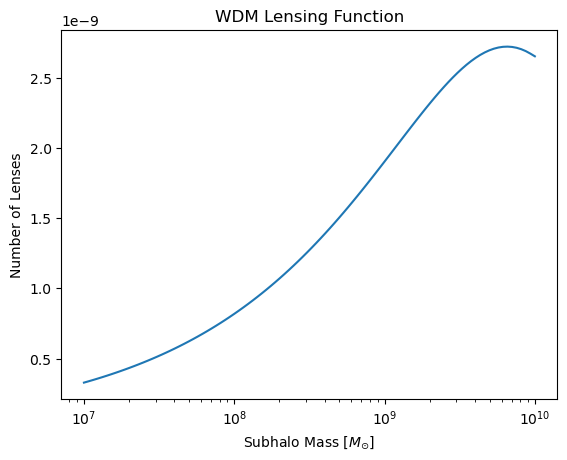

In [194]:
plt.title('WDM Lensing Function')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.ylabel('Number of Lenses')
plt.plot(wdm_l.m_l,wdm_l.n_l)
plt.show()

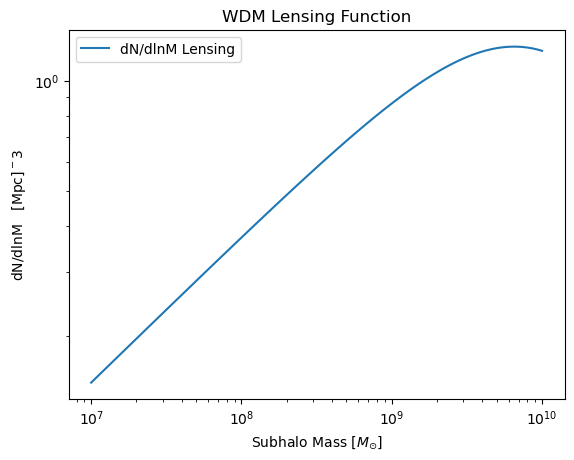

In [195]:
plt.title('WDM Lensing Function')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dN/dlnM $\,\,\,\, [\mathrm{Mpc}]^-3$')
plt.plot(wdm_l.m_l,wdm_l.m_l*wdm_l.den_n_l, label='dN/dlnM Lensing')
plt.legend()
plt.show()

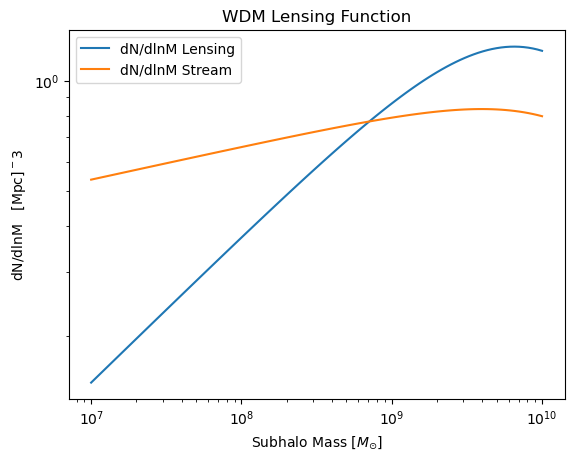

In [196]:
plt.title('WDM Lensing Function')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dN/dlnM $\,\,\,\, [\mathrm{Mpc}]^-3$')
plt.plot(wdm_l.m_l,wdm_l.m_l*wdm_l.den_n_l, label='dN/dlnM Lensing')
plt.plot(wdm_s.m_l,wdm_s.m_l*wdm_s.den_n_l, label='dN/dlnM Stream')
plt.legend()
plt.show()

In [363]:
arr = (1,2,3,4,5)
arr[:,1]

TypeError: tuple indices must be integers or slices, not tuple

In [372]:
print(np.random.rand(2,4)[:,:])

[[0.18975884 0.36160357 0.12273052 0.92912622]
 [0.23449396 0.78209388 0.39959372 0.47669505]]


In [426]:
l = np.array([[1,2,3,4,5], [0,0,0,0,0]])
t = [0]
t = t + l

In [437]:
p = np.empty((2,4))
l = np.array([[1,2,3,4,5], [0,0,0,0,0]],dtype=float)
p[0] = np.random.rand(4) + 1
p[1] = np.random.rand(4) + 2
print(p, l[:,1:])
l[:,1:] = p
l 

[[1.77692199 1.99870886 1.0284839  1.12495258]
 [2.76384694 2.98186896 2.37886858 2.00951166]] [[2. 3. 4. 5.]
 [0. 0. 0. 0.]]


array([[1.        , 1.77692199, 1.99870886, 1.0284839 , 1.12495258],
       [0.        , 2.76384694, 2.98186896, 2.37886858, 2.00951166]])

In [439]:
np.any(np.isnan([0,0,NaN,1,1]))

True

In [449]:
mydict = {'a': [10,11]}

In [450]:
mydict['a'][1]

11

In [470]:
Ml = [mf.CDM(), mf.Tinker]
print(np.size(Ml))
for m in Ml:
    print(Ml)

m-sur:  367.92016406427797 solMass
m_dm:  23241005099.88514 solMass
Norm: 1.5830647705769674e-08
2
[CDM(name='Test', n_l=<Quantity [0.        , 0.        , 2.70638796, 2.59542352, 2.48900871,
           2.38695702, 2.28908954, 2.19523472, 2.10522803, 2.01891171,
           1.93613443, 1.8567511 , 1.78062256, 1.70761536, 1.63760153,
           1.57045833, 1.50606806, 1.44431786, 1.38509947, 1.32830909,
           1.27384717, 1.22161824, 1.17153074, 1.12349688, 1.07743245,
           1.03325671, 0.99089222, 0.9502647 , 0.91130296, 0.87393868,
           0.83810638, 0.80374323, 0.770789  , 0.73918593, 0.70887861,
           0.67981392, 0.65194091, 0.62521072, 0.59957649, 0.5749933 ,
           0.55141803, 0.52880937, 0.50712769, 0.48633498, 0.46639479,
           0.44727216, 0.42893359, 0.41134691, 0.3944813 , 0.37830719,
           0.36279624, 0.34792126, 0.33365616, 0.31997594, 0.30685663,
           0.29427522, 0.28220966, 0.2706388 , 0.25954235, 0.24890087,
           0.2386957 , 0.22

## Testing Sampler

In [9]:
#reload(sampler)
import sampler as sm

In [15]:
import survey
r = survey.Roman()

In [17]:
pl = mf.PowerLaw(m_l = np.logspace(0, np.log10(1000), 100))
cdm = mf.CDM(m_l = np.logspace(5, 9, 100))
wdm = mf.WDM_stream(m_l = np.logspace(0, np.log10(1000), 100))
tinker =mf.Tinker(m_l = np.logspace(0, np.log10(1000), 20))
ps = mp.PointSource(Ml=1)
gauss = mp.Gaussian(Ml=1.e6*u.Msun,R0=0.01*u.kpc)
nfw = mp.NFW(Ml=1.e5*u.Msun, c200= 13)

In [29]:
wdm = mf.WDM_stream(m_l = np.logspace(0, np.log10(1000), 100))
nfw = mp.NFW(Ml=1.e6*u.Msun, c200= 13)

In [53]:
reload(mf)
reload(sm)

<module 'sampler' from '/Users/fangirl/Repos/Kris/dmsl/dmsl/sampler.py'>

In [96]:
%%time
reload(sm)
s = sm.Sampler(nstars=10000,survey=r, MassProfile=nfw)

Creating data vector
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_4_2_0.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_4_2_0.png
(10000, 2)
2024-01-20T11:01:59.129071: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_4_2_0.png
Loading prior
Prior loaded
Total pars: 2
Sampling..


  2%|████▍                                                                                                                                                                                                  | 44/2000 [00:02<01:33, 20.86it/s]/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/astropy/units/quantity.py:620: RuntimeWarning: invalid value encountered in add
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:29<00:00, 22.32it/s]


95\% upper limit on c200: 3.1106857469035503
95\% upper limit on log_Ml: 7.489964660902546
Wrote /Users/fangirl/Repos/Kris/dmsl/results/samples_Roman_nfw_4_3_2.pkl
Chains have been pruned. 4.0 chains remain
Wrote /Users/fangirl/Repos/Kris/dmsl/results/loglike_Roman_nfw_4_3_2.pkl
Wrote /Users/fangirl/Repos/Kris/dmsl/results/pruned_samples_Roman_nfw_4_3_2.pkl
flatchain: (8000, 2)
Ml
2024-01-20T11:03:28.887293: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_Ml_4_3_2.png
c200
2024-01-20T11:03:28.962119: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_c200_4_3_2.png
2024-01-20T11:03:30.265013: made /Users/fangirl/Repos/Kris/dmsl/results/corner_Roman_nfw_4_3_2.png
2024-01-20T11:03:30.380291: made /Users/fangirl/Repos/Kris/dmsl/results/chainsplot_Roman_nfw_4_3_2.png
2024-01-20T11:03:33.775802: made /Users/fangirl/Repos/Kris/dmsl/results/logprob_Roman_nfw_4_3_2.png
CPU times: user 1min 31s, sys: 1.12 s, total: 1min 32s
Wall time: 1min 34s


In [108]:
%%time
s = sm.Sampler(nstars=100,survey=r, MassFunction=pl)

Creating data vector
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_3_2_0.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
(1000, 2)
2023-10-15T14:09:52.328725: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
Loading prior
Prior loaded
Sampling nfw..


/Users/fangirl/Repos/Kris/dmsl/dmsl/mass_function.py:62: RuntimeWarning: invalid value encountered in scalar power
  self.den_n_l[i] = np.ceil((self.m_l[i] / self.M_0) ** self.alpha)


emcee: Exception while calling your likelihood function:
  params: [1138.06112135    1.14738186]
  args: []
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/sampler.py", line 313, in lnlike
    alphal = self.samplealphal(pars) #FIXME for mf, gets array of alphal
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/sampler.py", line 285, in samplealphal
    alphal = lm.alphal(newmassprofile, bvec, vvec) #FIXME Test if it works for new_mass function and newmassprofile array-- for loop instead?
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/lensing_model.py", line 32, in alphal
    vec_part = alphal_vec(Ml, bvec, vvec)
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/lensing_model.py", line 95, in alphal_vec
    Term2 += (m.Mprime(b) * b)[:, np.newaxis] * Bterm
  File "/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/astropy/units/quantity.py", line 1130, in __mul__
    return super().__mul__(other)
  

KeyboardInterrupt: 

In [133]:
%%time
s = sm.Sampler(nstars=1000, survey=r,nchains=20, MassFunction=pl, MassProfile=nfw)

Creating data vector
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_3_2_0.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
(1000, 2)
2023-11-06T13:22:12.897005: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
Loading prior
Prior loaded
Total pars: 3
Sampling..


  2%|███▌                                                                                                                                                                 | 43/2000 [00:07<04:52,  6.68it/s]/Users/fangirl/Repos/Kris/dmsl/dmsl/mass_function.py:62: RuntimeWarning: overflow encountered in scalar power
  self.den_n_l[i] = np.ceil((self.m_l[i] / 10**self.logM_0) ** (10**self.logalpha))
/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/numpy/lib/function_base.py:1448: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
  3%|████▎                                                                                                                                                                | 52/2000 [00:08<05:15,  6.17it/s]/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/astropy/units/quantity.py:620: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, 

95\% upper limit on c200: 7.576819552348247
95\% upper limit on log alpha$: 1.9754811615126404
95\% upper limit on log M_0: 6.383934924125491
Wrote /Users/fangirl/Repos/Kris/dmsl/results/samples_Roman_nfw_PowerLaw_3_3_2.pkl
Chains have been pruned. 20.0 chains remain
Wrote /Users/fangirl/Repos/Kris/dmsl/results/loglike_Roman_nfw_PowerLaw_3_3_2.pkl
Wrote /Users/fangirl/Repos/Kris/dmsl/results/pruned_samples_Roman_nfw_PowerLaw_3_3_2.pkl
flatchain: (20000, 3)
logalpha
2023-11-06T13:29:17.498784: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_PowerLaw_logalpha_3_3_2.png
logM_0
2023-11-06T13:29:17.740432: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_PowerLaw_logM_0_3_3_2.png
2023-11-06T13:29:18.010293: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_PowerLaw_c200_3_3_2.png
2023-11-06T13:29:23.221285: made /Users/fangirl/Repos/Kris/dmsl/results/corner_Roman_nfw_PowerLaw_3_3_2.png
2023-11-06T13:29:23.538726: made /Users/fangirl/Repos/Kris/dmsl/results/chai

In [100]:
%%time
s = sm.Sampler(nstars=1000, survey=r,ndims=2, nsamples= 3000, nchains=20 , MassFunction=wdm, MassProfile=nfw)

Creating data vector
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_3_2_0.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
(1000, 2)
2023-11-02T16:29:43.831944: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
Loading prior
Prior loaded
Total pars: 4
Sampling..


  3%|████▌                                                                                                                                                               | 110/4000 [00:17<11:08,  5.82it/s]/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/astropy/units/quantity.py:620: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/astropy/units/quantity.py:620: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4000/4000 [09:47<00:00,  6.81it/s]


95\% upper limit on c200: 7.599348367916811
95\% upper limit on m_wdm: 468.82631414135074
95\% upper limit on b: 94.96070346663967
95\% upper limit on logc: 28.13795791507504
Wrote /Users/fangirl/Repos/Kris/dmsl/results/samples_Roman_nfw_WDM Stream_3_3_2.pkl
Chains have been pruned. 20.0 chains remain
Wrote /Users/fangirl/Repos/Kris/dmsl/results/loglike_Roman_nfw_WDM Stream_3_3_2.pkl
Wrote /Users/fangirl/Repos/Kris/dmsl/results/pruned_samples_Roman_nfw_WDM Stream_3_3_2.pkl
flatchain: (60000, 4)
m_wdm
2023-11-02T16:39:31.857342: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_WDM Stream_m_wdm_3_3_2.png
gamma
2023-11-02T16:39:32.102050: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_WDM Stream_gamma_3_3_2.png
beta
2023-11-02T16:39:32.357230: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_WDM Stream_beta_3_3_2.png
2023-11-02T16:39:32.616328: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_WDM Stream_c200_3_3_2.png
2023-11-02T16:39:38.751031: m

In [149]:
%%time
s = sm.Sampler(nstars=1000,survey=r,ndims=2, MassFunction=wdm, MassProfile=nfw)

Creating data vector
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_3_2_0.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
(1000, 2)
2023-11-13T13:23:52.631785: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
Loading prior
Prior loaded
Total pars: 4
Sampling..


 37%|█████████████████████████████████████████████████████████████▎                                                                                                      | 747/2000 [00:57<01:08, 18.42it/s]/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/astropy/units/quantity.py:620: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/astropy/units/quantity.py:620: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
 39%|███████████████████████████████████████████████████████████████▋                                                                                                    | 777/2000 [00:59<01:37, 12.50it/s]/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/astropy/units/quantity.py:620: RuntimeWarning: overflow encountered in divide


95\% upper limit on c200: 7.592678029218545
95\% upper limit on m_wdm: 47.92173772801692
95\% upper limit on gamma: 95.5182834121775
95\% upper limit on beta: 47.97458474807817
Wrote /Users/fangirl/Repos/Kris/dmsl/results/samples_Roman_nfw_WDM Stream_3_3_2.pkl
Chains have been pruned. 7.0 chains remain
Wrote /Users/fangirl/Repos/Kris/dmsl/results/loglike_Roman_nfw_WDM Stream_3_3_2.pkl
Wrote /Users/fangirl/Repos/Kris/dmsl/results/pruned_samples_Roman_nfw_WDM Stream_3_3_2.pkl
flatchain: (8000, 4)
m_wdm
2023-11-13T13:26:44.084266: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_WDM Stream_m_wdm_3_3_2.png
gamma
2023-11-13T13:26:44.360165: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_WDM Stream_gamma_3_3_2.png
beta
2023-11-13T13:26:44.658809: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_WDM Stream_beta_3_3_2.png
2023-11-13T13:26:44.951774: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_WDM Stream_c200_3_3_2.png
2023-11-13T13:26:54.780094: m

In [19]:
%%time
s = sm.Sampler(nstars=10000,survey=r,nchains=50, MassFunction=cdm, MassProfile=nfw)

Creating data vector
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_4_2_0.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_4_2_0.png
(10000, 2)
2024-01-17T20:30:16.577460: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_4_2_0.png
Loading prior
Prior loaded
Total pars: 2
Sampling..


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [08:27<00:00,  3.94it/s]


95\% upper limit on c200: 7.569946280841822
95\% upper limit on log_a: -0.43281242018162835
Wrote /Users/fangirl/Repos/Kris/dmsl/results/samples_Roman_nfw_CDM_4_3_2.pkl
Chains have been pruned. 50.0 chains remain
Wrote /Users/fangirl/Repos/Kris/dmsl/results/loglike_Roman_nfw_CDM_4_3_2.pkl
Wrote /Users/fangirl/Repos/Kris/dmsl/results/pruned_samples_Roman_nfw_CDM_4_3_2.pkl
flatchain: (50000, 2)
loga
2024-01-17T20:38:44.201680: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_CDM_loga_4_3_2.png
2024-01-17T20:38:44.274598: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_CDM_c200_4_3_2.png
2024-01-17T20:38:45.544478: made /Users/fangirl/Repos/Kris/dmsl/results/corner_Roman_nfw_CDM_4_3_2.png
2024-01-17T20:38:45.782257: made /Users/fangirl/Repos/Kris/dmsl/results/chainsplot_Roman_nfw_CDM_4_3_2.png
2024-01-17T20:38:45.917136: made /Users/fangirl/Repos/Kris/dmsl/results/logprob_Roman_nfw_CDM_4_3_2.png
CPU times: user 8min 28s, sys: 2.35 s, total: 8min 30s
Wall time: 8min 29

In [143]:
%%time
s = sm.Sampler(nstars=10, survey=r,nchains=18, MassFunction=tinker, MassProfile=nfw)

Creating data vector
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_1_2_0.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_1_2_0.png
(10, 2)
2023-11-06T14:03:23.712472: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_1_2_0.png
Loading prior
Prior loaded
Total pars: 8
Sampling..


  0%|▋                                                                                                                                                                | 8/2000 [54:44<265:32:29, 479.89s/it]

emcee: Exception while calling your likelihood function:
  params: [1.48152778 0.1740489  1.72165342 2.16459194 1.83183214 1.66627669
 2.04477057 0.13594849]
  args: []
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/sampler.py", line 312, in lnlike
    alphal = self.samplealphal(pars) #FIXME for mf, gets array of alphal
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/sampler.py", line 250, in samplealphal
    newmassprofile, newmassfunction = self.make_new_mass(pars) #FIXME Array of new mass profiles + new mass_function
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/sampler.py", line 423, in make_new_mass
    newmf = mf.Tinker(A= A, a= a, b= b, c= c, k_b=k_b, n_b=n_b, k_s=k_s)
  File "<string>", line 24, in __init__
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/mass_function.py", line 190, in __post_init__
    self.der_sig()
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/mass_function.py", line 164, in der_sig
    f_1 = quad_vec(integrand_der, 1e-3, 100000, limit=100)
 

KeyboardInterrupt: 

In [84]:
%%time
s = sm.Sampler(nstars=1000, ndims=1, survey=r, MassFunction=wdm, MassProfile=ps)

Creating data vector
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_3_1_0.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_1_0.png
(1000, 1)
2023-10-18T15:40:07.844331: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_1_0.png
Loading prior
Prior loaded
Sampling..


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [20:45<00:00,  1.61it/s]


95\% upper limit on m_wdm: 189.48316809697175
Wrote /Users/fangirl/Repos/Kris/dmsl/results/samples_Roman_ps_WDM Stream_3_3_1.pkl
Chains have been pruned. 8.0 chains remain
Wrote /Users/fangirl/Repos/Kris/dmsl/results/loglike_Roman_ps_WDM Stream_3_3_1.pkl
Wrote /Users/fangirl/Repos/Kris/dmsl/results/pruned_samples_Roman_ps_WDM Stream_3_3_1.pkl
flatchain: (8000, 1)
m_wdm
2023-10-18T16:01:03.457852: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_ps_wdm_m_wdm_3_3_1.png
2023-10-18T16:01:08.591918: made /Users/fangirl/Repos/Kris/dmsl/results/corner_test_ps_wdm_3_3_1.png
2023-10-18T16:01:09.106727: made /Users/fangirl/Repos/Kris/dmsl/results/chainsplot_Roman_ps_WDM Stream_3_3_1.png
2023-10-18T16:01:09.393563: made /Users/fangirl/Repos/Kris/dmsl/results/logprob_Roman_ps_WDM Stream_3_3_1.png
CPU times: user 18min 36s, sys: 30.9 s, total: 19min 7s
Wall time: 21min 2s


In [81]:
%%time
s = sm.Sampler(nstars=1000, survey=r, MassFunction=cdm, MassProfile=ps)

Creating data vector
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_3_2_0.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
(1000, 2)
2023-10-18T14:15:21.311430: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
Loading prior
Prior loaded
Sampling..


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [46:04<00:00,  1.38s/it]


95\% upper limit on loga: 0.5158760376397268
95\% upper limit on b: -0.24360443794186626
95\% upper limit on logc: 7.780522221992577
Wrote /Users/fangirl/Repos/Kris/dmsl/results/samples_Roman_ps_CDM_3_3_2.pkl
Chains have been pruned. 8.0 chains remain
Wrote /Users/fangirl/Repos/Kris/dmsl/results/loglike_Roman_ps_CDM_3_3_2.pkl
Wrote /Users/fangirl/Repos/Kris/dmsl/results/pruned_samples_Roman_ps_CDM_3_3_2.pkl
flatchain: (8000, 3)
loga
2023-10-18T15:01:28.772027: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_ps_cdm_loga_3_3_2.png
b
2023-10-18T15:01:29.317029: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_ps_cdm_b_3_3_2.png
logc
2023-10-18T15:01:29.945858: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_ps_cdm_logc_3_3_2.png
2023-10-18T15:01:41.677212: made /Users/fangirl/Repos/Kris/dmsl/results/corner_test_ps_cdm_3_3_2.png
2023-10-18T15:01:45.179510: made /Users/fangirl/Repos/Kris/dmsl/results/chainsplot_Roman_ps_CDM_3_3_2.png
2023-10-18T15:01:46.021881: made /Use

In [37]:
%%time
s = sm.Sampler(nstars=1000, survey=r, MassFunction=pl, MassProfile=ps)

Creating data vector
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_3_2_0.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
(1000, 2)
2023-10-18T11:53:33.097283: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
Loading prior
Prior loaded
Sampling..


  2%|███                                                                                                                                                                  | 37/2000 [00:51<38:57,  1.19s/it]/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/astropy/units/quantity.py:620: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/astropy/units/quantity.py:620: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
  3%|█████                                                                                                                                                                | 62/2000 [01:20<35:29,  1.10s/it]/Users/fangirl/Repos/Kris/dmsl/dmsl/mass_function.py:62: RuntimeWarning: overflow encountered in scalar power
  self.den_n_l[i] = np.ceil((self.m

95\% upper limit on alpha: 1.8954463334302194
95\% upper limit on logM0: 6.450217389849552
Wrote /Users/fangirl/Repos/Kris/dmsl/results/samples_Roman_ps_PowerLaw_3_3_2.pkl
Chains have been pruned. 8.0 chains remain
Wrote /Users/fangirl/Repos/Kris/dmsl/results/loglike_Roman_ps_PowerLaw_3_3_2.pkl
Wrote /Users/fangirl/Repos/Kris/dmsl/results/pruned_samples_Roman_ps_PowerLaw_3_3_2.pkl
flatchain: (8000, 2)
logalpha
2023-10-18T12:34:42.399574: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_ps_pl_logalpha_3_3_2.png
logM_0
2023-10-18T12:34:42.849697: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_ps_pl_logM_0_3_3_2.png
2023-10-18T12:34:56.835840: made /Users/fangirl/Repos/Kris/dmsl/results/corner_test_ps_pl_3_3_2.png
2023-10-18T12:34:57.580992: made /Users/fangirl/Repos/Kris/dmsl/results/chainsplot_Roman_ps_PowerLaw_3_3_2.png
2023-10-18T12:34:58.447689: made /Users/fangirl/Repos/Kris/dmsl/results/logprob_Roman_ps_PowerLaw_3_3_2.png
CPU times: user 21min 9s, sys: 7.48 s, total: 

In [3]:
import pickle
import plotting as plot

with open('../results/samples_Roman_nfw_CDM_3_3_2.pkl', 'rb') as f:
    data = pickle.load(f)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [7]:
data.shape

(8000, 2)

In [157]:
plot.plot_emcee(data,1000,1000,2,nfw,'Roman','None',massfunction=cdm)

loga
2023-11-14T12:53:45.056781: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_CDM_loga_frac_3_3_2.png
b
2023-11-14T12:53:45.411355: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_CDM_b_frac_3_3_2.png
logc
2023-11-14T12:53:45.816193: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_CDM_logc_frac_3_3_2.png
2023-11-14T12:53:46.187063: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_CDM_c200_3_3_2.png
2023-11-14T12:53:48.349572: made /Users/fangirl/Repos/Kris/dmsl/results/corner_Roman_nfw_CDM_frac_3_3_2.png


In [13]:
plot.plot_emcee(data,10000,1000,2,nfw,'Roman','None',massfunction=cdm)

loga
2024-01-17T19:50:05.404678: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_CDM_loga_frac_4_3_2.png
2024-01-17T19:50:05.474948: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_CDM_c200_4_3_2.png
2024-01-17T19:50:05.615996: made /Users/fangirl/Repos/Kris/dmsl/results/corner_Roman_nfw_CDM_frac_4_3_2.png


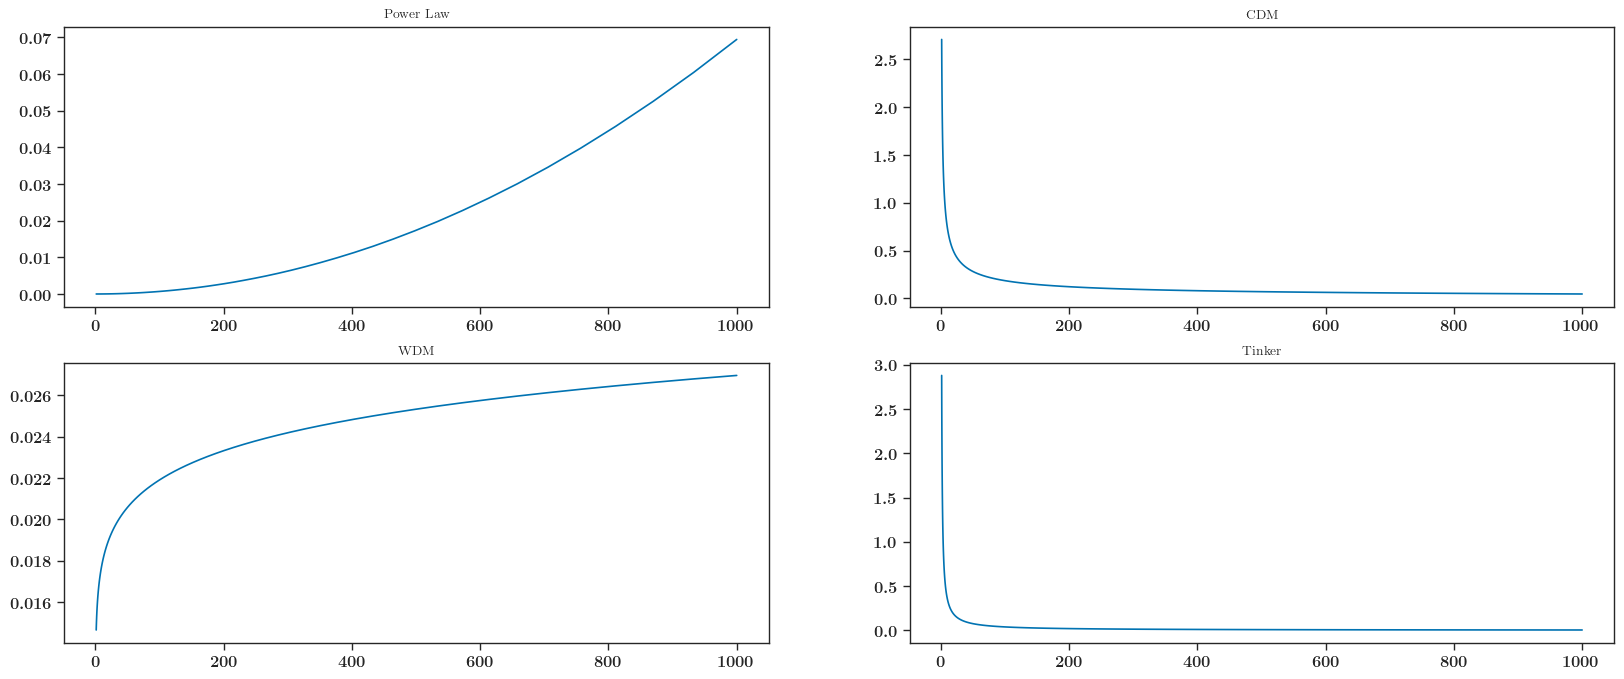

In [59]:
figure, axis = plt.subplots(2, 2, figsize=(20,8)) 
X = pl.m_l[2:]
Y1 = pl.n_l[2:]
Y2 = cdm.n_l[2:]
Y3 = wdm.n_l[2:]
Y4 = tinker.n_l[2:]

# For Sine Function 
axis[0, 0].plot(X, Y1) 
axis[0, 0].set_title("Power Law") 
  
# For Cosine Function 
axis[0, 1].plot(X, Y2) 
axis[0, 1].set_title("CDM") 
  
# For Tangent Function 
axis[1, 0].plot(X, Y3) 
axis[1, 0].set_title("WDM") 
  
# For Tanh Function 
axis[1, 1].plot(X, Y4) 
axis[1, 1].set_title("Tinker") 
  
# Combine all the operations and display 
plt.show()

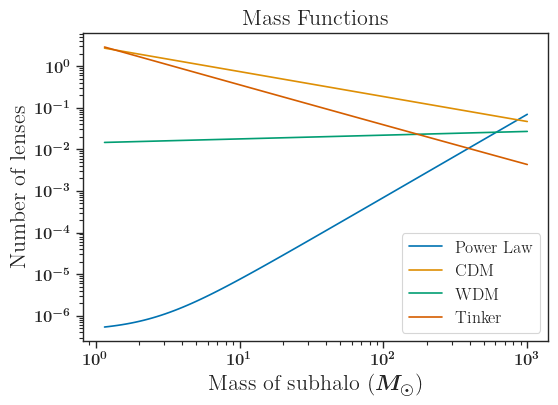

In [73]:
poly = np.polyfit(X,Y1,3)
p = np.poly1d(poly)(X)
plt.title('Mass Functions',fontsize=(16))
plt.ylabel('Number of lenses')
plt.xlabel(r'Mass of subhalo (\(M_\odot\))')
plt.xscale('log')
plt.yscale('log')
plt.plot(X,p,label='Power Law')
plt.plot(X,Y2,label='CDM')
plt.plot(wdm.m_l[2:],Y3,label='WDM')
plt.plot(X,Y4,label='Tinker')
plt.legend()
plt.show()

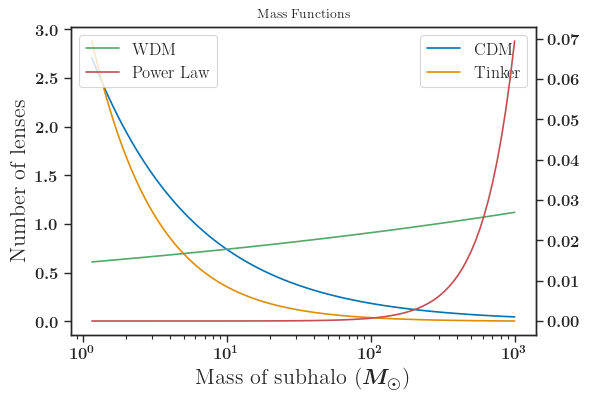

In [298]:
fig, ax1 = plt.subplots()
ax1.set_title('Mass Functions')
ax1.set_ylabel('Number of lenses')
ax1.set_xlabel(r'Mass of subhalo (\(M_\odot\))')
ax1.set_xscale('log')
ax1.plot(X,Y2,label='CDM')
ax1.plot(X,Y4,label='Tinker')
ax1.legend()


ax2 = ax1.twinx()

ax2.plot(X,Y3,label='WDM', c='g')
ax2.plot(X,Y1,label='Power Law', c='r')
ax2.legend()

plt.show()

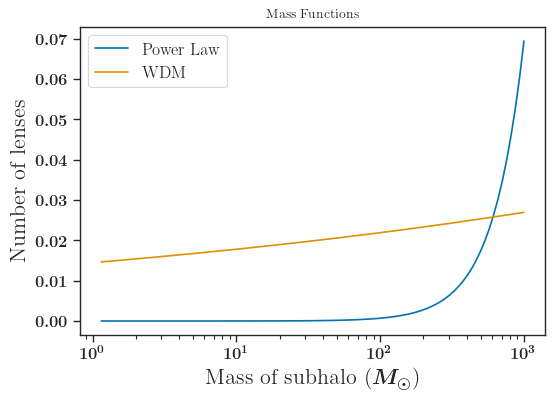

In [289]:
plt.title('Mass Functions')
plt.ylabel('Number of lenses')
plt.xlabel(r'Mass of subhalo (\(M_\odot\))')
plt.xscale('log')
plt.plot(X,Y1,label='Power Law')
# plt.plot(X,Y2,label='CDM')
plt.plot(X,Y3,label='WDM')
# plt.plot(X,Y4,label='Tinker')
plt.legend()
plt.show()

In [ ]:
sc.stats.truncnorm.rvs

In [152]:
a = np.logspace(0,2,100, dtype=float)
x = pm.distributions.continuous.Normal.dist#(a, 10**priorpdfspline(np.log10(a)))

In [47]:
pm.draw(x,100)


You can find the C code in this temporary file: /var/folders/hf/2pg78bm9707fg8q_4xghmrdh0000gn/T/pytensor_compilation_error_sfibpx8p


CompileError: Compilation failed (return status=1):
/Users/fangirl/miniconda3/envs/project/bin/clang++ -dynamiclib -g -Wno-c++11-narrowing -fno-exceptions -fno-unwind-tables -fno-asynchronous-unwind-tables -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -undefined dynamic_lookup -I/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/numpy/core/include -I/Users/fangirl/miniconda3/envs/project/include/python3.8 -I/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/pytensor/link/c/c_code -L/Users/fangirl/miniconda3/envs/project/lib -fvisibility=hidden -o /Users/fangirl/.pytensor/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.8.15-64/lazylinker_ext/lazylinker_ext.so /Users/fangirl/.pytensor/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.8.15-64/lazylinker_ext/mod.cpp
ld: unsupported tapi file type '!tapi-tbd' in YAML file '/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/lib/libSystem.tbd' for architecture x86_64
clang-14: error: linker command failed with exit code 1 (use -v to see invocation)


In [74]:
with pm.Model():
    test = pm.Interpolated('interpolated_random_variable',a, 10**(np.log10(a)))

In [112]:
t =pm.Interpolated.dist(a, 10**(np.log10(a)))
t

interpolated_rv{0, (1, 1, 1), floatX, False}.out

In [153]:
num_s = np.interp(a,xp = a, fp=10**(np.log10(a)))
#num_s = num_s/sum((num_s))
ab = a/np.sum(a)

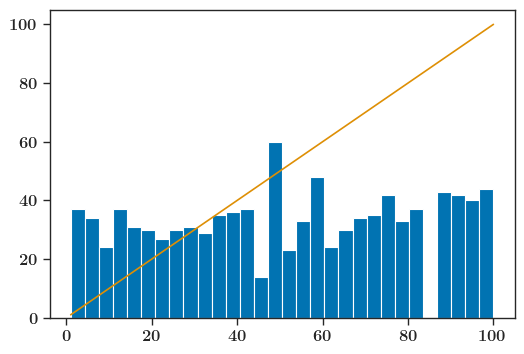

In [156]:
plt.hist(np.random.choice(num_s, 1000, p = 10**(np.log10(ab))), bins=30)
plt.plot(a, 10**(np.log10(a)))

In [292]:
a=np.logspace(0,2,10, dtype=float)
b=10**(np.log10(a))

In [293]:
sci_s = scipy.interpolate.interp1d(a, b, fill_value='extrapolate')

In [42]:
xnew=np.logspace(0,2,10)

In [43]:
sci = sci_s(xnew)

NameError: name 'sci_s' is not defined

In [298]:
np.random.choice(xnew,10, p = sci/sum(sci))

array([ 35.93813664,  59.94842503, 100.        ,  59.94842503,
        35.93813664, 100.        ,  59.94842503,  59.94842503,
        59.94842503, 100.        ])

In [226]:
x=np.random.normal(size=1000)

In [36]:
#x=np.logspace(1,np.log10(1000), 100)
x = np.linspace(1,1000, 1000)
y=10**np.log10(x)

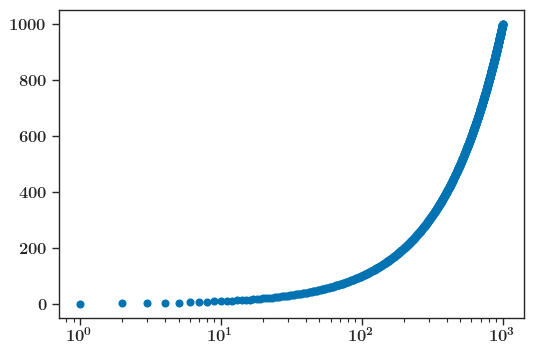

In [58]:
plt.xscale('log')
plt.plot(x,y, 'o')

In [37]:
sci_s = scipy.interpolate.interp1d(x, y, fill_value='extrapolate')

In [34]:
xnew = np.linspace(1,1000, 1000)
#xnew=np.logspace(1,np.log10(1000), 1000)

In [38]:
sci = sci_s(xnew)

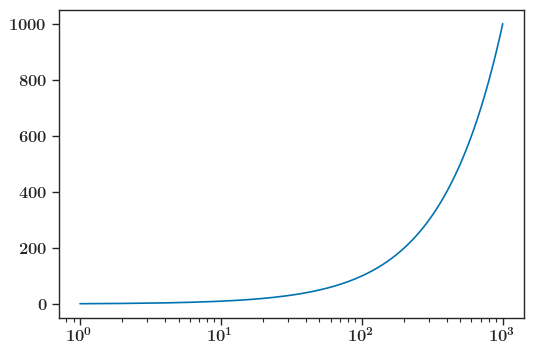

In [66]:
plt.plot(xnew, sci)
plt.xscale('log')

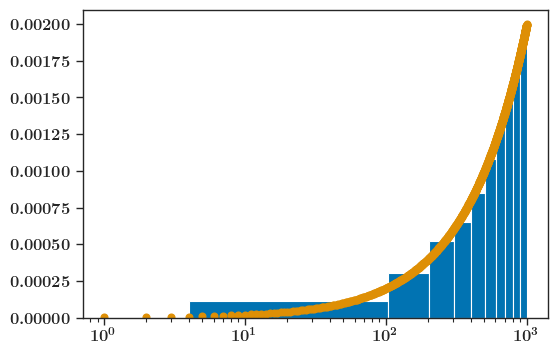

In [40]:
fig, ax1 = plt.subplots()

ax1.hist(np.random.choice(xnew, 10000, p=sci/sum(sci)), density=True)
ax1.plot(x,y/sum(y), 'o')
ax1.set_xscale('log')
#ax2=ax1.twinx()

# plt.xscale('log')
# # plt.xscale('log')

#ax2.set_xscale('log')

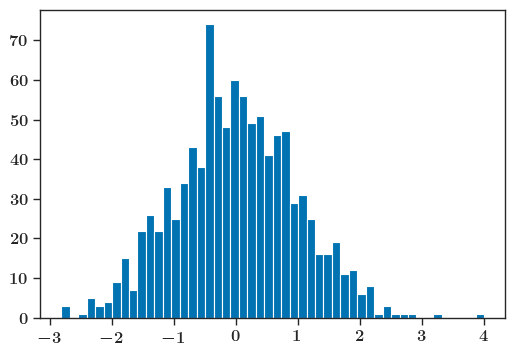

In [227]:
(a, b,_ ) = plt.hist(x, bins=50)
# plt.show()

In [229]:
sci_s = scipy.interpolate.interp1d(b[:-1], a, fill_value='extrapolate')

In [240]:
bnew=np.linspace(-3,3, 100)
prob = sci_s(bnew)

(array([ 1275475.,  3082729.,  8779000., 13540381., 24615403., 22116073.,
        14883089.,  7938109.,  3199801.,   569940.]),
 array([-3.        , -2.41212121, -1.82424242, -1.23636364, -0.64848485,
        -0.06060606,  0.52727273,  1.11515152,  1.7030303 ,  2.29090909,
         2.87878788]),
 <a list of 10 Patch objects>)

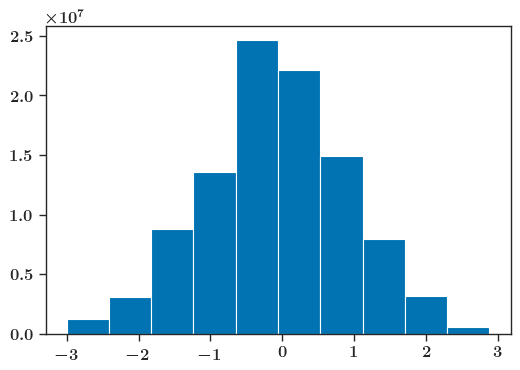

In [242]:
plt.hist(np.random.choice(bnew, 10**8, p=prob/sum(prob)))

ValueError: x and y must have same first dimension, but have shapes (1000,) and (50,)

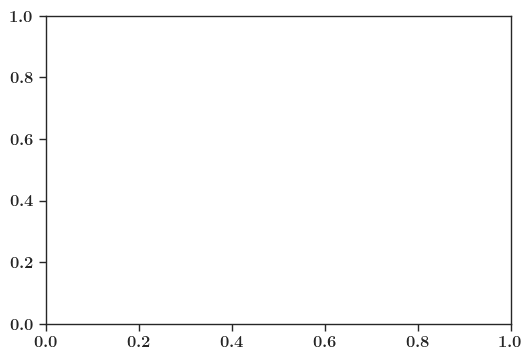

In [222]:
plt.plot(a,b)

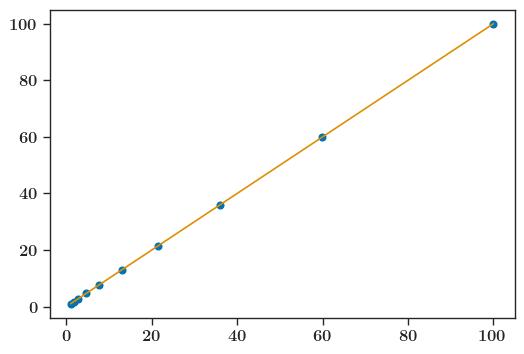

In [193]:
plt.plot(a,b, 'o')
plt.plot(anew,sci, '-')

(array([5., 1., 1., 1., 0., 1., 0., 0., 0., 1.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

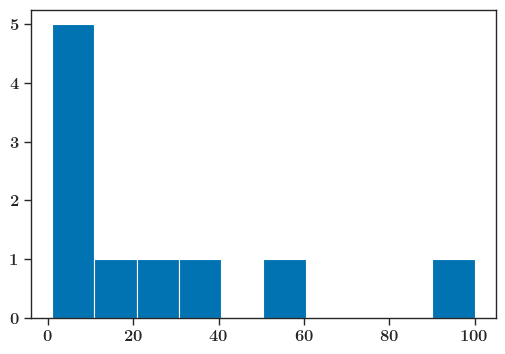

In [202]:
# sci = sci_s(ab)
sci = sci/np.sum(sci)
plt.hist(b)
# plt.hist(np.random.choice(anew, 1000, p = sci))

(array([52., 14.,  8.,  6.,  5.,  4.,  3.,  3.,  2.,  3.]),
 array([0.0004589 , 0.00500196, 0.00954503, 0.0140881 , 0.01863117,
        0.02317424, 0.02771731, 0.03226038, 0.03680344, 0.04134651,
        0.04588958]),
 <a list of 10 Patch objects>)

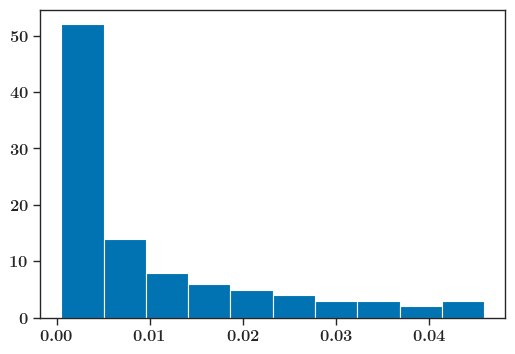

In [162]:
plt.hist(sci)

In [43]:
import pymc as p

In [44]:
og = p.draw(p.distributions.continuous.Interpolated.dist(x,y),1000)
my = np.random.choice(x, 1000, p =sci/sum(sci))


You can find the C code in this temporary file: /var/folders/hf/2pg78bm9707fg8q_4xghmrdh0000gn/T/pytensor_compilation_error_wf60fqrq


CompileError: Compilation failed (return status=1):
/Users/fangirl/miniconda3/envs/project/bin/clang++ -dynamiclib -g -Wno-c++11-narrowing -fno-exceptions -fno-unwind-tables -fno-asynchronous-unwind-tables -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -undefined dynamic_lookup -I/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/numpy/core/include -I/Users/fangirl/miniconda3/envs/project/include/python3.8 -I/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/pytensor/link/c/c_code -L/Users/fangirl/miniconda3/envs/project/lib -fvisibility=hidden -o /Users/fangirl/.pytensor/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.8.15-64/lazylinker_ext/lazylinker_ext.so /Users/fangirl/.pytensor/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.8.15-64/lazylinker_ext/mod.cpp
ld: unsupported tapi file type '!tapi-tbd' in YAML file '/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/lib/libSystem.tbd' for architecture x86_64
clang-14: error: linker command failed with exit code 1 (use -v to see invocation)


In [27]:
a = np.linspace(0,10,num =10, dtype=int)

In [34]:
b = 0.5*a
b

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 5. ])

In [33]:
b.astype(int)

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 5])

In [35]:
np.ceil(0.5*a)

array([0., 1., 1., 2., 2., 3., 3., 4., 4., 5.])

In [69]:
z = 10 
np.size(z)

1

In [29]:
import seaborn as sns
import corner

In [27]:
def paper_plot():
    sns.set_context("paper")
    sns.set_style('ticks')
    sns.set_palette('colorblind')
    plt.rc('font', family='serif', serif='cm10')
    figparams = {
            'text.latex.preamble': r'\usepackage{amsmath} \boldmath \bf',
            'text.usetex':True,
            'axes.labelsize':16.,
            'xtick.labelsize':12,
            'ytick.labelsize':12,
            'figure.figsize':[6., 4.],
            'font.family':'DejaVu Sans',
            'legend.fontsize':12}
    plt.rcParams.update(figparams)
    cs = plt.rcParams['axes.prop_cycle'].by_key()['color']
    return cs


In [25]:
# import corner 
# Set up the parameters of the problem.
ndim, nsamples = 2, 5000

# Generate some fake data.
np.random.seed(42)
data1 = np.random.randn(ndim * 4 * nsamples // 5).reshape(
    [4 * nsamples // 5, ndim]
)
data2 = 4 * np.random.rand(ndim)[None, :] + np.random.randn(
    ndim * nsamples // 5
).reshape([nsamples // 5, ndim])
data = np.vstack([data1, data2])

In [30]:
import matplotlib

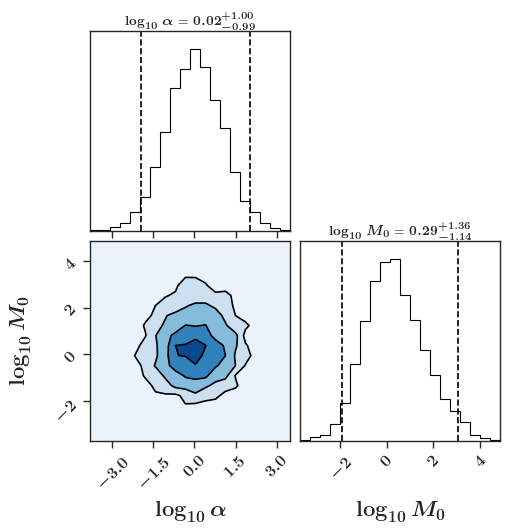

In [35]:
plt.close('all')
paper_plot()
fig = corner.corner(data, labels=['$\\log_{{10}} {\\alpha}$','$\\log_{{10}} {M_0}$'],#['$\\log_{{10}} {a}$','$b$','$\\log_{{10}} {c}$'], #
                        # TODO match names to mass function params, mass_function.py
                        quantiles=[0.025, 0.975], show_titles=True, fill_contours=True,
                        contourf_kwargs={'colors': None, 'cmap': 'Blues'})#, title_kwargs={"fontsize": 0},
                        #label_kwargs={"fontsize": 20})  # FIXME for general case


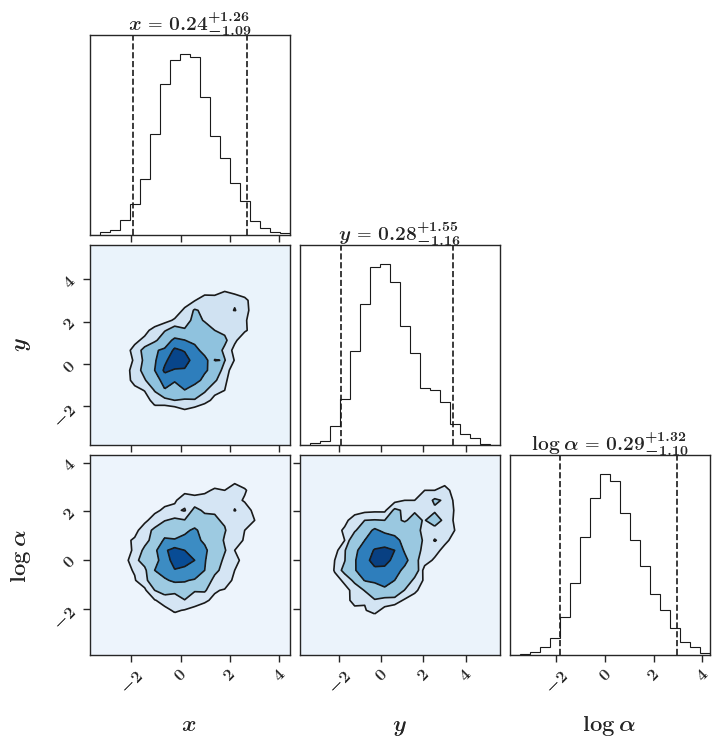

In [302]:
plt.close('all')
# paper_plot()
#fig=plt.figure(figsize=(20,20))
# sns.set()
# Plot it.
figure = corner.corner(
    data,
    labels=[
        r"$x$",
        r"$y$",
        r"$\log \alpha$",
        r"$\Gamma \, [\mathrm{parsec}]$",
    ],
    label_kwargs={"fontsize": 16},
    quantiles=[0.025,0.975],
    show_titles=True,
    title_kwargs={"fontsize": 16},
#     fig=fig,
#     color='dodgerblue',
    fill_contours=True,
    contourf_kwargs={'colors':None,'cmap':'Blues'},
#     plot_contours= False,
    plot_density=True,
#     plot_datapoints=False,
#     cmap='viridis'
#     hist2d_kwargs={'pcolor_kwargs':{'cmap':'viridis'}},
)

# for ax in np.array(fig.axes).flatten():
#     if hasattr(ax, "collections"):
#         for coll in ax.collections:
#             if isinstance(coll, matplotlib.collections.QuadMesh):
#                 coll.set_cmap("Purples")
                
plt.show()

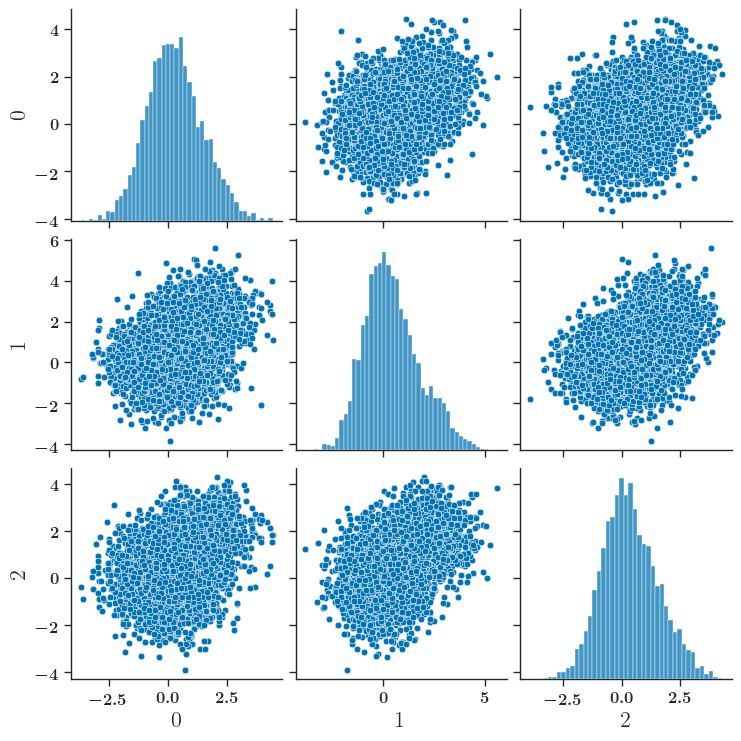

In [274]:
d = pd.DataFrame(data)


/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


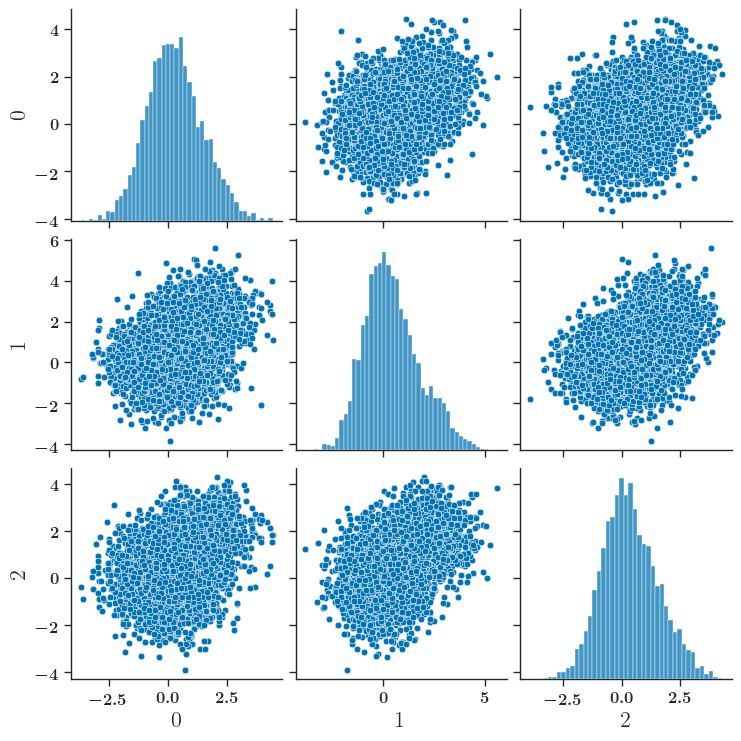

In [277]:
sns.pairplot(d, palette='viridis')

### Testing CDM 

In [25]:
%%time
cdm = mf.CDM(m_l = np.logspace(7,9,100))

CPU times: user 561 µs, sys: 16 µs, total: 577 µs
Wall time: 566 µs


In [103]:
def cdm_test(m_l=np.logspace(7,9,100)):
    a = 3.26*10**-5
    b = -1.85
    c = 2.57*10**7
    den_nl = a * (m_l[:]/c)**b
    return den_nl

In [104]:
test_den = cdm_test()

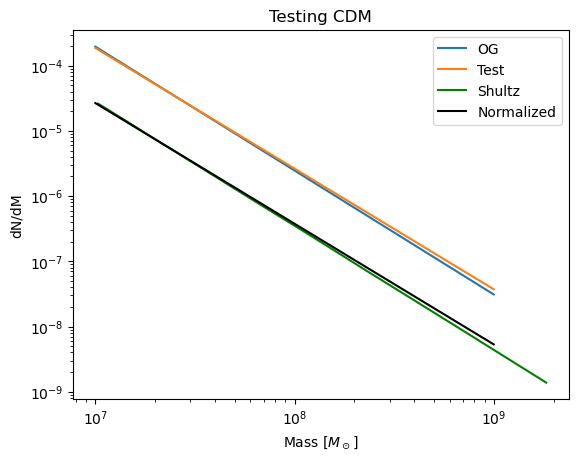

In [105]:
norm = 1/7
plt.title('Testing CDM')
plt.ylabel('dN/dM')
plt.xlabel(r'Mass [$M_\odot$]')
plt.xscale('log')
plt.yscale('log')
plt.plot(cdm.m_l,cdm.den_n_l, label='OG')
plt.plot(cdm.m_l,test_den, label='Test')
plt.plot(d.x,d.y/d.x, 'g', label='Shultz')
plt.plot(cdm.m_l,norm*test_den, label='Normalized', c='black')
plt.legend()
plt.show()

In [88]:
np.allclose(cdm.den_n_l,test_den, atol=0)

True

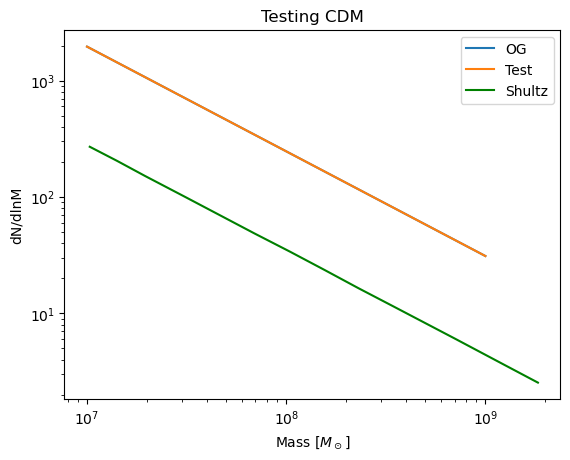

In [51]:
plt.title('Testing CDM')
plt.ylabel('dN/dlnM')
plt.xlabel(r'Mass [$M_\odot$]')
plt.xscale('log')
plt.yscale('log')
plt.plot(cdm.m_l,cdm.m_l*cdm.den_n_l, label='OG')
plt.plot(cdm.m_l,cdm.m_l*test_den, label='Test')

d = pd.read_csv('~/Downloads/ShultzCDM.csv')
plt.plot(d.x,d.y, 'g', label='Shultz')

plt.legend()
plt.show()

## Testing log-prob

In [22]:
pars=[13,-9] #M_l,c200,log_a
chi = s.lnlike(pars)
print(chi)

-inf
